In [2]:
# 加载IMDB数据集
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data[0]: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
train_labels[0]: 1


In [ ]:
print("train_data[0]:",train_data[0])
print("train_labels[0]:",train_labels[0])

In [7]:
# 将评论解码为单词
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 为甚i-3，因为作者预留了3个特殊数字[0,1,2],0代表padding，1代表start of sequence，2代表unknown，
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [12]:
# 看看英文的TOP3单词
print(reverse_word_index.get(1))
print(reverse_word_index.get(2))
print(reverse_word_index.get(3))

the
and
a


###准备数据
需要将列表转换为张量，转换方法：
1. 填充列表，比如每篇影评统一取100字
2. 对列表进行one-hot编码，将其转换为0和1组成的向量
![img](images/003-003.png)

实现代码如下：

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
# 将标签转换为one-hot向量
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

以上已经把数据准备好了，下面要构建网络

## 构建网络
输入的数据是向量，标签是标量（0和1），这是最简单的情况。
每个带有relu激活的Dense层都实现了下列张量运算：
```python
output = relu(dot(w,input) + b)
```
 对于这种Dense层的堆叠，需要确定一下2个关键架构
 1. 网络有多少层
 2. 每层有多少个隐藏单元

 在本例子中，我们采用了如下架构：
 1. 两个中间层，每层有16个隐藏单元
 2. 第三层输出一个标量，预测当前评论的情感

 中间层使用relu作为激活函数，最后一层用sigmoid激活以输出一个0-1范围内的概率值

relu函数和sigmoid函数图象如下：
![img](images/003-004.png)

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2021-12-12 21:40:33.884538: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


图示：
![img](images/003-005.png)

In [18]:
#  编译模型
model.compile(optimizer='rmsprop',
                            loss='binary_crossentropy', 
                            metrics=['accuracy'])

为了在训练过程中监控模型在之前未见的数据上的精度，需要将原始训练数据留出1万个样本作为验证集

In [19]:
# 留出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
# 训练模型
history = model.fit(partial_x_train,
                    partial_y_train,  # 只训练部分数据
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) # 验证集

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5247 - accuracy: 0.7895 - val_loss: 0.4035 - val_accuracy: 0.8675
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3151 - accuracy: 0.9055 - val_loss: 0.3250 - val_accuracy: 0.8753
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2310 - accuracy: 0.9257 - val_loss: 0.2838 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1827 - accuracy: 0.9417 - val_loss: 0.2730 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1486 - accuracy: 0.9532 - val_loss: 0.2770 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1190 - accuracy: 0.9629 - val_loss: 0.2942 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1021 - accuracy: 0.9693 - val_loss: 0.3144 - val_accuracy: 0.8791
Epoch 8/20
30

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

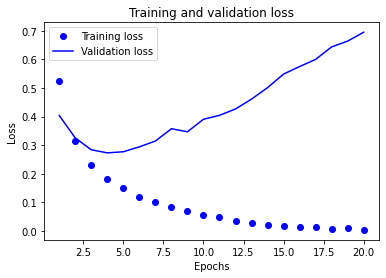

In [22]:
# 回执训练损失和验证损失
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

上面这个图形表示，虽然我们的训练损失越来越小，也就是预测越来越准确，但是验证损失越来越大，也就是训练测试过多了，训练这么多后面浪费掉了，看图例只要训练4次就可以

In [23]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.2334 - accuracy: 0.9462
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1345 - accuracy: 0.9601
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1040 - accuracy: 0.9685
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.4851 - accuracy: 0.8607: 1s - loss:


In [24]:
results

[0.4850534498691559, 0.8606799840927124]

只做4次就能到86%以上的准确率了